## Logistic Regression from scratch (Binary Classification)
Implementation of Logistic Regression for Binary Classification using Gradient Descent.

#### Sources:

[Cost Function and Gradient Descent](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)


#### Optimization algorithms:
[[advanced-optimization]](https://www.coursera.org/learn/machine-learning/lecture/licwf/advanced-optimization)
- Gradient descent
- Conjugate gradient
- BFGS
- L-BFGS


#### Useful Links:

[Logistic regression (binary) - computing the gradient](https://www.youtube.com/watch?v=hWLdFMccpTY)


### Notes

#### Overfitting
If dataset has a lot of features, then it can cause overfitting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression




prng = RandomState(10)

### Hypothesis function

Logistic Regression hypothesis function is defined as:

$$h_\theta(x) = g(z),$$

where function g is the Sigmoid function and is defined as:

$$g(z)= \frac{1}{1+e^{-z}},$$

and 

$$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^TX$$

### Sigmoid function - Implementation

In [2]:
def sigmoid_function(z):
    """
    Applies sigmoid function to an integer or an array
    
    Params:
        z (int or array)
    """
    return 1/(1+(np.exp(-z)))



### Sigmoid function - Properties
[[decision-boundary]](https://www.coursera.org/learn/machine-learning/supplement/N8qsm/decision-boundary)

$$z = 0 \implies e^{-z} = 1 \implies  g(z) \rightarrow 0.5$$

$$z \rightarrow \infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 1$$

$$z \rightarrow -\infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 0$$

### Test Sigmoid Function

In [3]:
print('z=0, g(z) = {}'.format(sigmoid_function(0)))
print('z=20, g(z) = {}'.format(sigmoid_function(20).round(8)))
print('z=-20, g(z) = {}'.format(sigmoid_function(-20).round(8)))

z=0, g(z) = 0.5
z=20, g(z) = 1.0
z=-20, g(z) = 0.0


### Vectoried Cost Function:
[[cost-function]](https://www.coursera.org/learn/machine-learning/supplement/bgEt4/cost-function)

We will try to minimise the cost function.

$$h=g(X\theta)$$

$$J(\theta) = \frac{1}{m} (-y^{T}log(h) - (1-y)^{T}log(1-h))$$

In [4]:
def cost_function(x, y, theta):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    return J[0, 0]



### Gradient Descent:
[[gradient-descent]](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)

We will use Gradient Descent to minimise the cost function.

General form of gradient descent:

$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta),$$

repeat until convergence.

Vectorised implementation after working out the partial derivatives:

$$\theta := \theta - \frac{\alpha}{m} X^T(g(X\theta) - y)$$


In [5]:
def gradient_descent(x, y, theta, alpha=0.01):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    theta = theta - ((alpha/m) * (x.T @ errors))
    return theta
    

In [6]:
def fit(x, y, alpha=0.01, steps=1000):
    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent(x, y, theta, alpha)
        cost = cost_function(x, y, theta)
        costs.append(cost)
    return {'costs': costs, 'theta': theta}


### Testing implementation

In [7]:
df = pd.read_csv('./data/ex2data1.txt', header=None, names=['x1', 'x2', 'y'])

x = df[['x1', 'x2']].to_numpy()
y = df[['y']].to_numpy()


In [8]:
df.tail(3)

,x1,x2,y
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


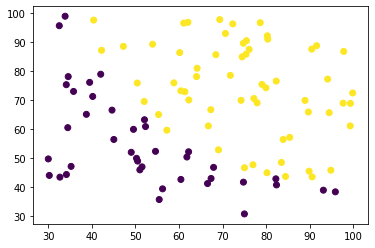

In [9]:
plt.scatter(df['x1'], df['x2'], c=df['y']);

In [33]:
alpha = 0.0009
steps = 200000
result = fit(x, y, alpha=alpha, steps=steps)

In [34]:
costs, theta = result['costs'], result['theta']

In [35]:
print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

theta_0 = -7.010230917814085
theta_1 = 0.06209394526734941
theta_2 = 0.0555120261194164


### Test cost values

Cost values should always decrease, if not then we may have to adjust our learning rate, alpha.

In [36]:
def check_cost(costs):
    """
    Checks if the cost is always decreasing.
    """
    for i in range(len(costs)-1):
        if costs[i] < costs[i+1]:
            print('error: cost increased at step: {}\nDecrease your learning rate...'.format(i+1))
            return 
        

In [37]:
check_cost(costs)

In [38]:
print(
    """
    Learning rate, alpha = {} seems to be low enough for our gradient descent algorithm to converge to minimum.
    """.format(alpha)
)


    Learning rate, alpha = 0.0009 seems to be low enough for our gradient descent algorithm to converge to minimum.
    


### Plot Cost by itteration

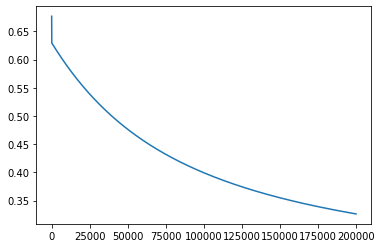

In [39]:
plt.plot(costs);

### Plot the hypothesis curve

Since we only have two features $x_1$ and $x_2$, we can plot one as a function of another on a 2D graph:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

We want to plot $x_2$ as a function of $x_1$, hence rearranging for $x_2$, we get:

$$x_2 = -\frac{1}{\theta_2}(\theta_0 + \theta_1x_1)$$

Let $\theta \setminus \theta_2$ be a column vector with all values of $\theta$ except $\theta_2$, then the Vectorised form is:

$$x_2 = -\frac{1}{\theta_2}X\theta \setminus \theta_2$$


In [40]:
def plot(x, y, theta):
    x1_plot = np.linspace(x[:, 0].min(), x[:, 1].max())[:, np.newaxis]
    ones = np.ones((x1_plot.shape[0], 1))

    x1 = np.append(ones, x1_plot, axis=1)
    x2_plot = -(1/theta[2, 0]) * x1 @ theta[:2, :]

    plt.scatter(x[:, 0], x[:, 1], c=y);
    plt.plot(x1_plot[:, 0], x2_plot[:, 0])

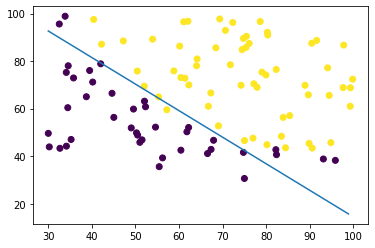

In [41]:
plot(x, y, theta)

### Logistic Regression using Sklearn

In [42]:
model = LogisticRegression()
model.fit(x, y[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
theta = np.append(model.intercept_, model.coef_)[:, np.newaxis]
theta

array([[-25.05219314],
       [  0.20535491],
       [  0.2005838 ]])

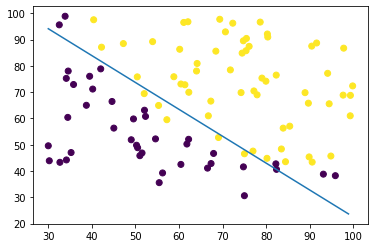

In [44]:
plot(x, y, theta)

## Regularized Logistic Regression

If we have too many features in our dataset. 

#### Lasso (L1) and Ridge (L2) Regularization Methods
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c


We will be implementing L2 Regularization method, also known as Ridge Regression.

### Adding Regularization:
To implement regularization, we must add the regularization terms to:
- **Cost function**
- **Gradient Descent Algorithm**. 

### Regularized Cost Function

In [101]:
def cost_function_L2(x, y, theta):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    return J[0, 0]



### Regularized Gradient Descent Algorithm

In [98]:
def gradient_descent_L2(x, y, theta, alpha=0.01, l=2):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
        l (float): lambda value for regularization
        
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    
    theta_0 = theta[0, 0].copy()
    theta_j = theta[1:, :].copy()
    
    # No regularization for theta_0
    theta_0 = theta_0 - ((alpha/m) * (x[:, 0][:, np.newaxis].T @ errors))
    
    # regulartization term
    r = 1 - (alpha * l/m)
    
    tmp_derivative = ( (alpha/m) * (x[:, 1:].T @ errors) )
    
    # Update theta_1, theta_2, ..., theta_n
    theta_j = (theta_j * r) - tmp_derivative
    
    # append theta0 and thetaj values
    theta = np.append(theta_0, theta_j, axis=0)
    
    return theta
    

In [99]:
def fit(x, y, alpha=0.01, steps=10):
    m = y.shape[0]
    n = x.shape[1]
    
    # x with ones appended, (m * n+1)
    x_ones = np.append(np.ones((m, 1)), x, axis=1)

    theta = np.zeros((n+1, 1))
    
    theta = gradient_descent_L2(x_ones, y, theta, alpha)
#         cost = cost_function(x, y, theta)
#         costs.append(cost)
#     return {'costs': costs, 'theta': theta}
    return theta

fit(x, y, 0.01, 1)

array([[0.001     ],
       [0.12009217],
       [0.11262842]])

In [74]:
np.app

array([[34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
        45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
        95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
        53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
        67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
        62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
        61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
        54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
        83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
        62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
        79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
        49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
        75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
        66.56089447, 40.45755098, 49.07256322, 80.2

In [ ]:
# df = pd.read_csv('./data/ex2data2.txt', header=None, names=['x1', 'x2', 'y'])

# x = df[['x1', 'x2']].to_numpy()
# y = df[['y']].to_numpy()

In [ ]:
# plt.scatter(df['x1'], df['x2'], c=df['y']);

In [ ]:
# alpha = 0.0004
# steps = 500000
# result = fit(x, y, alpha=alpha, steps=steps)

In [ ]:
# costs, theta = result['costs'], result['theta']

# check_cost(costs)

In [ ]:
# plt.plot(costs);

In [ ]:
# print('theta_0 = %s'%theta[0, 0], 'theta_1 = %s'%theta[1, 0], 'theta_2 = %s'%theta[2, 0], sep='\n')

#### Overfitting problem
https://www.coursera.org/learn/machine-learning/supplement/VTe37/the-problem-of-overfitting


#### Cost function with regularisation
https://www.coursera.org/learn/machine-learning/supplement/1tJlY/cost-function


#### Regularized Logistic Regression
https://www.coursera.org/learn/machine-learning/supplement/v51eg/regularized-logistic-regression

#### Regularized Linear Regression
https://www.coursera.org/learn/machine-learning/supplement/pKAsc/regularized-linear-regression